In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# import functions from sklearn to perform different clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

# import functions from scipy to plot the dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
from yellowbrick.classifier import ScoreVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [13]:
# !pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df=pd.read_csv('data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [3]:
df.drop(['id','diagnosis'],axis=1,inplace=True)

# 1. check info
#2.missing values
#3.outlires
#4.correlation heatmap/pairplot


# Apply first model kmeans
#Decide the number of clusters - using  elbow plot and silhoutte score

# Apply PCA to reduce the dimensions-   High dimentional data to apply PCA
# Apply the other secound kmeans model select the k value
# write the interpritations of each features whith cluster label


# Apply the AgAgglomerative Clusteringg
# Write the interpritation of each features with cluster labels


# Apply DBSCAN -optional   # Density Based Special clustering of Application Noice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [6]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.describe(include=float)

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [8]:
Total = df.isnull().sum().sort_values(ascending=False)  # missing data
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
radius_mean                  0                           0.0
texture_mean                 0                           0.0
symmetry_worst               0                           0.0
concave points_worst         0                           0.0
concavity_worst              0                           0.0
compactness_worst            0                           0.0
smoothness_worst             0                           0.0
area_worst                   0                           0.0
perimeter_worst              0                           0.0
texture_worst                0                           0.0
radius_worst                 0                           0.0
fractal_dimension_se         0                           0.0
symmetry_se                  0                           0.0
concave points_se            0                           0.0
concavity_se                 0                           0.0
compactness_se               0                           0.0
smoothness_se                0                           0.0
area_se                      0                           0.0
perimeter_se                 0                           0.0
texture_se                   0                           0.0
radius_se                    0                           0.0
fractal_dimension_mean       0                           0.0
symmetry_mean                0                           0.0
concave points_mean          0                           0.0
concavity_mean               0                           0.0
compactness_mean             0                           0.0
smoothness_mean              0                           0.0
area_mean                    0                           0.0
perimeter_mean               0                           0.0
fractal_dimension_worst      0                           0.0

In [9]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.area_mean.unique()     # 

array([1001. , 1326. , 1203. ,  386.1, 1297. ,  477.1, 1040. ,  577.9,
        519.8,  475.9,  797.8,  781. , 1123. ,  782.7,  578.3,  658.8,
        684.5,  798.8, 1260. ,  566.3,  520. ,  273.9,  704.4, 1404. ,
        904.6,  912.7,  644.8, 1094. ,  732.4,  955.1, 1088. ,  440.6,
        899.3, 1162. ,  807.2,  869.5,  633. ,  523.8,  698.8,  559.2,
        563. ,  371.1, 1104. ,  545.2,  531.5, 1076. ,  201.9,  534.6,
        449.3,  561. ,  427.9,  571.8,  437.6, 1033. ,  712.8,  409. ,
       1152. ,  656.9,  527.2,  224.5,  311.9,  221.8,  645.7,  260.9,
        499. ,  668.3,  269.4,  394.1,  250.5,  502.5, 1130. ,  244. ,
        929.4,  584.1,  470.9,  817.7, 1006. , 1245. ,  506.3,  401.5,
       1878. , 1132. ,  443.3, 1075. ,  648.2,  466.1,  651.9,  662.7,
        728.2,  551.7,  555.1,  705.6, 1264. ,  451.1,  294.5,  412.6,
        642.5,  582.7,  143.5,  458.7,  298.3,  336.1,  530.2,  412.5,
        466.7, 1509. ,  396.5,  290.2,  480.4,  629.9,  334.2,  230.9,
      

In [11]:
# outlire tritment
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q1-q3
ll=q1-1.5*iqr
ul=q3+1.5*iqr
trimed_data=df[~((df<ll)|(df>ul)).any(axis=1)]

In [12]:
ll

radius_mean                  17.820000
texture_mean                 24.615000
perimeter_mean              118.565000
area_mean                   963.900000
smoothness_mean               0.114765
compactness_mean              0.163140
concavity_mean                0.181270
concave points_mean           0.100845
symmetry_mean                 0.212600
fractal_dimension_mean        0.070330
radius_se                     0.602150
texture_se                    1.794050
perimeter_se                  4.232500
area_se                      58.860000
smoothness_se                 0.009635
compactness_se                0.042135
concavity_se                  0.055530
concave points_se             0.018246
symmetry_se                   0.027640
fractal_dimension_se          0.005713
radius_worst                 21.680000
texture_worst                34.040000
perimeter_worst             146.045000
area_worst                 1368.350000
smoothness_worst              0.160700
compactness_worst        

In [13]:
ul

radius_mean                  9.660000
texture_mean                13.355000
perimeter_mean              60.705000
area_mean                  239.100000
smoothness_mean              0.076905
compactness_mean             0.032180
concavity_mean              -0.021010
concave points_mean         -0.006535
symmetry_mean                0.145000
fractal_dimension_mean       0.053490
radius_se                    0.109150
texture_se                   0.513850
perimeter_se                 0.730500
area_se                      4.180000
smoothness_se                0.003680
compactness_se               0.003395
concavity_se                 0.001610
concave points_se            0.004102
symmetry_se                  0.011000
fractal_dimension_se         0.001093
radius_worst                10.120000
texture_worst               16.760000
perimeter_worst             63.465000
area_worst                 230.950000
smoothness_worst             0.101900
compactness_worst            0.051250
concavity_wo

<Axes: >

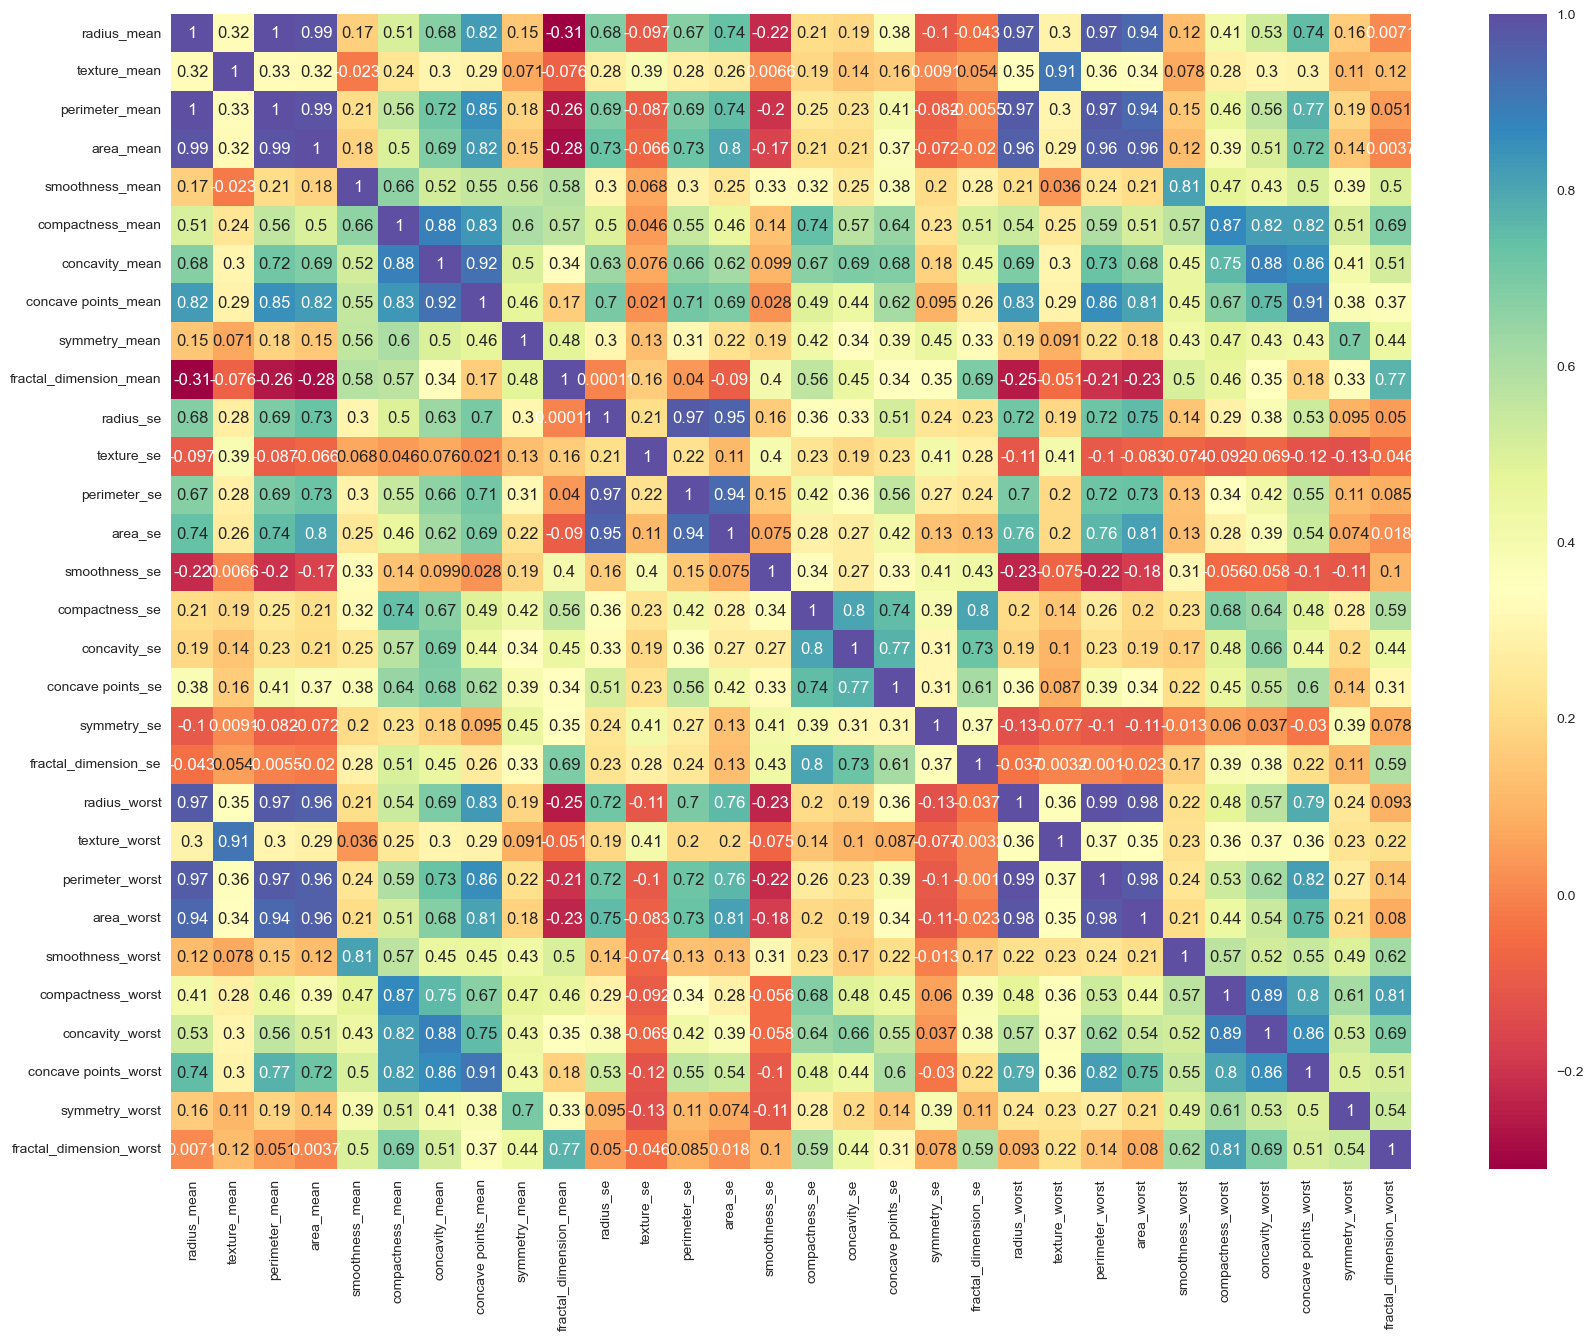

In [14]:
plt.figure(figsize=(20,15))  # show multicorrainality
sns.heatmap(df.corr(), annot=True, cmap='Spectral')

In [15]:
sns.pairplot(df.corr(),diag_kind='kde')
plt.show()

In [2]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples

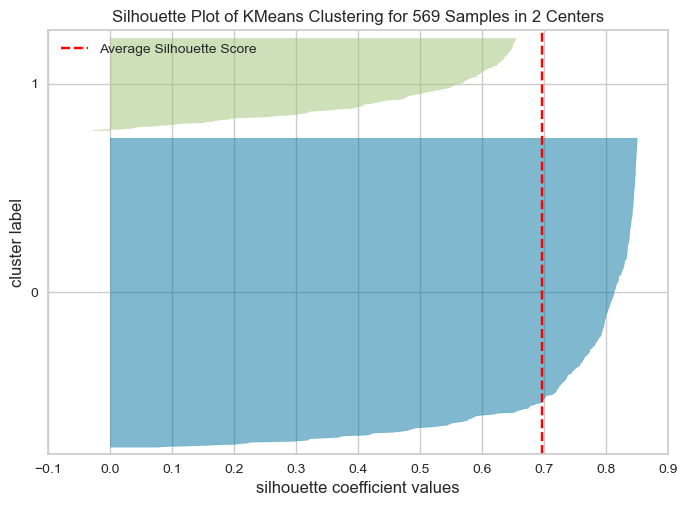

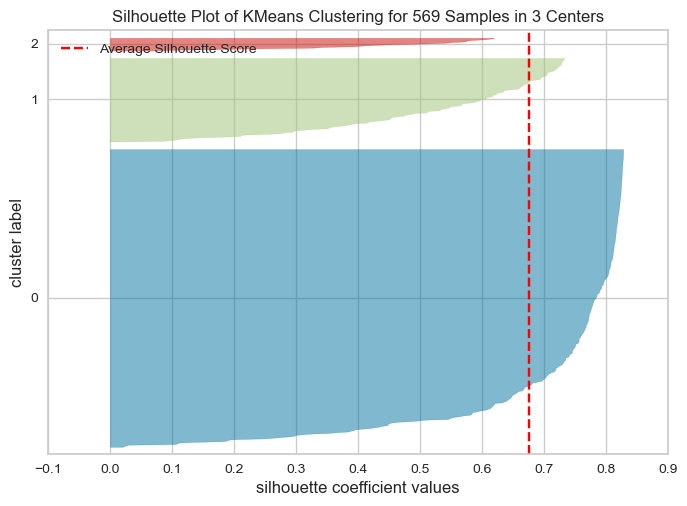

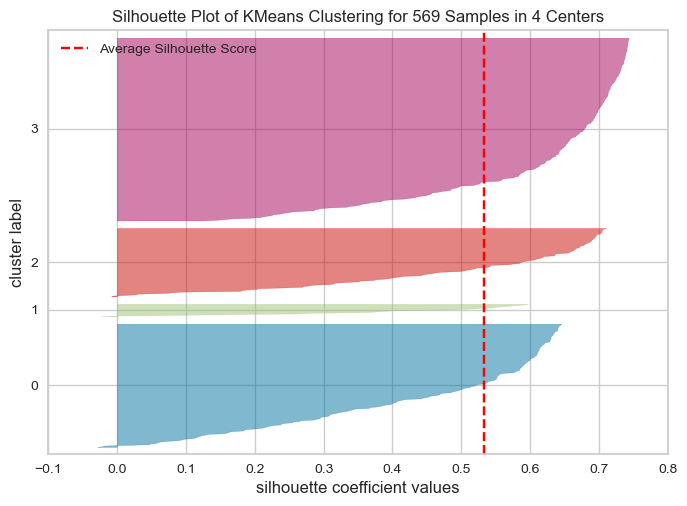

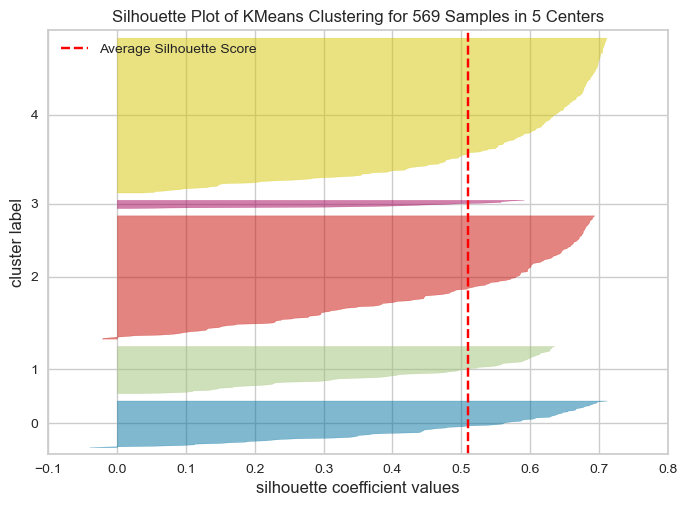

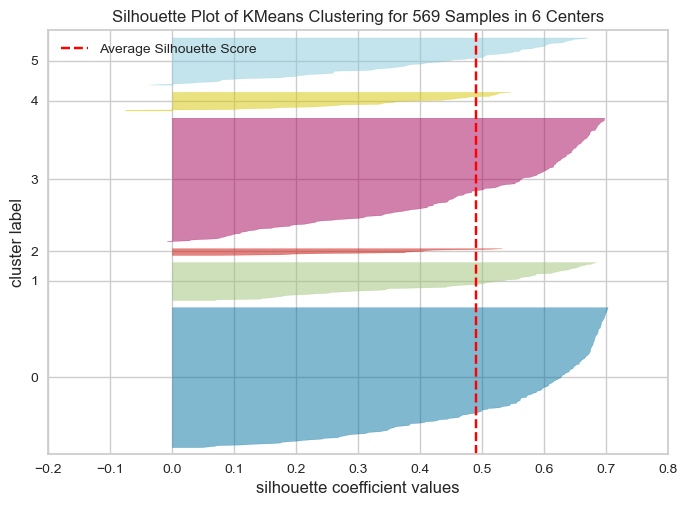

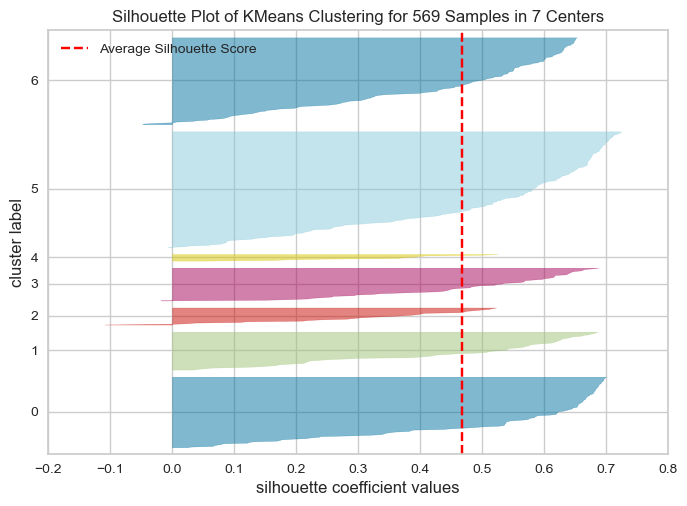

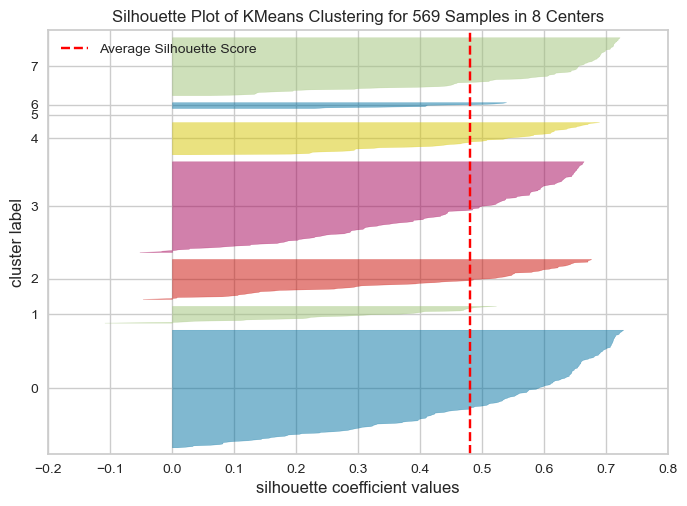

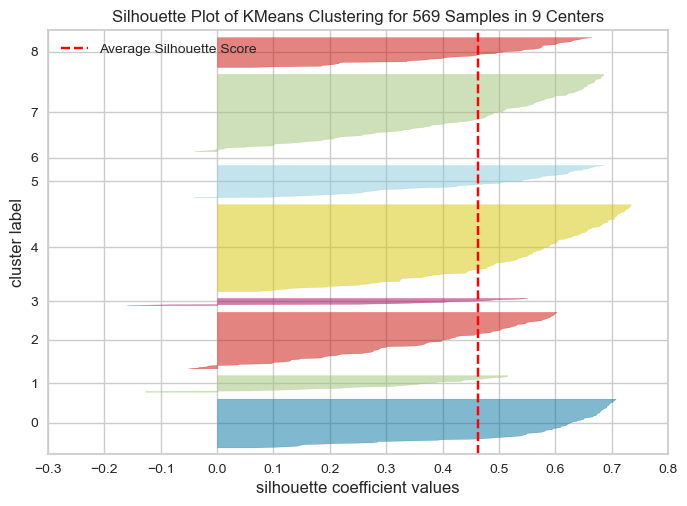

In [17]:
for i in range(2,10):
    kms=KMeans(n_clusters=i)
    kms.fit(df)
    model=KMeans(n_clusters=i,random_state=42)
    visualizer=SilhouetteVisualizer(model,colors='yellowbrick')    # unfitt the data is all the cross line 
    visualizer.fit(df)  # fit the data to the visualizer
    visualizer.show()  # Finlize and render the figure
    # Average the silhouette Score of the in rade line